# Лабораторная работа №6. Многоскоростная обработка сигналов.


In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import display, Math

In [3]:
def DTFT(x, M=2048):
    """
    Функция вычисляет значения ДВПФ в M точках на отрезке 
    по оси нормированных частот [-0.5; 0.5]

    Parameters
    ----------
    x : complex
        входная последовательность отсчетов, первый отсчет при k=0
    M : int
        колличество точек на отрезке [-0.5; 0.5]

    Returns
    -------
    float
        значения оси нормированных частот, 
        соотвествующих вычисленным значениям
        спектральной функции  
    complex
        значения спектральной функции      
    """
    f = np.fft.fftshift(np.fft.fftfreq(M, d=1))
    x_dtft = np.fft.fftshift(np.fft.fft(x, M))
    
    return f, x_dtft

# Модуль 1. Интерполяция сигналов.

## Задача 1.1. Интерполяция сигналов с помощью ДПФ.


Пусть некоторый периодический сигнал $y(t)$ был дискретизован в соответствии с теоремой Котельникова,  $x[k]$ — один период получившейся последовательности отсчетов. Произведите интерполяцию с коэффициентом $L=5$ путем добавления нулей в середину ДПФ сигнала $x[k]$. Объясните, почему восстановление сигнала в данном случае точное.

|Вариант| 	x[k]                                                                                        |   N 	|
|:-----:|:---------------------------------------------------------------------------------------------:|:-----:|
| 1     | $$ \cos{\left (\dfrac{3 \pi}{5} k \right )} + 4 \cos{\left (\dfrac{4 \pi}{5} k \right )} $$ 	| 10 	|
| 2     | $$ 0.2 \cos{\left (\dfrac{\pi k}{4} \right )} + \cos{\left (\dfrac{3 \pi}{4} k \right )} $$ 	| 8 	|
| 3     | $$ \cos{\left (\dfrac{\pi k}{5} \right )} + 3 \cos{\left (\dfrac{4 \pi}{5} k \right )}  $$ 	    | 10 	|
| 4     | $$ 0.1 \cos{\left (\dfrac{\pi k}{4} \right )} + \cos{\left (\dfrac{3 \pi}{4} k \right )} $$ 	| 8 	|
| 5     | $$ \cos{\left (\dfrac{2 \pi}{5} k \right )} + 6 \cos{\left (\dfrac{3 \pi}{5} k \right )} $$ 	| 10 	|
| 6     | $$ 0.1 \cos{\left (\dfrac{\pi k}{5} \right )} + \cos{\left (\dfrac{4 \pi}{5} k \right )} $$ 	| 10 	|

__Замечание__: для интерполяции периодического сигнала крайне важно, чтобы в исходный временной итервал входило целое число периода сигнала, иначе при интерполяции будут заметны наложения во временной области и интерполированный сигнал будет отличаться от исходного непрерывного сигнала

Четное N

In [4]:
N = 10
L = 5
k = np.arange(N)
a1, a2 = 1., 4. 
f1, f2 = 0.3, 0.44
x = a1 * np.cos(2*np.pi*f1*k) + a2 * np.cos(2*np.pi*f2*k)

T = 2**12
t = np.linspace(0, N, T)
x_cont = a1 * np.cos(2*np.pi*f1*t) + a2 * np.cos(2*np.pi*f2*t)

Нечетное N

In [5]:
# N = 15
# L = 5
# k = np.arange(N)
# a1, a2 = 1., 4. 
# f1, f2 = 3/15, 4/15
# x = a1 * np.cos(2*np.pi*f1*k) + a2 * np.cos(2*np.pi*f2*k)

# T = 2**12
# t = np.linspace(0, N, T)
# x_cont = a1 * np.cos(2*np.pi*f1*t) + a2 * np.cos(2*np.pi*f2*t)

In [6]:
X = np.fft.fft(x)

if N % 2 == 0:
    X_zp = np.concatenate((X[:N//2], [X[N//2]/2], np.zeros(N*(L-1)-1), [X[N//2].conj()/2], X[N//2+1:]))
else:
    X_zp = np.concatenate((X[:N//2+1], np.zeros(N*(L-1)), X[N//2+1:]))  
    
y = np.fft.ifft(X_zp).real * L

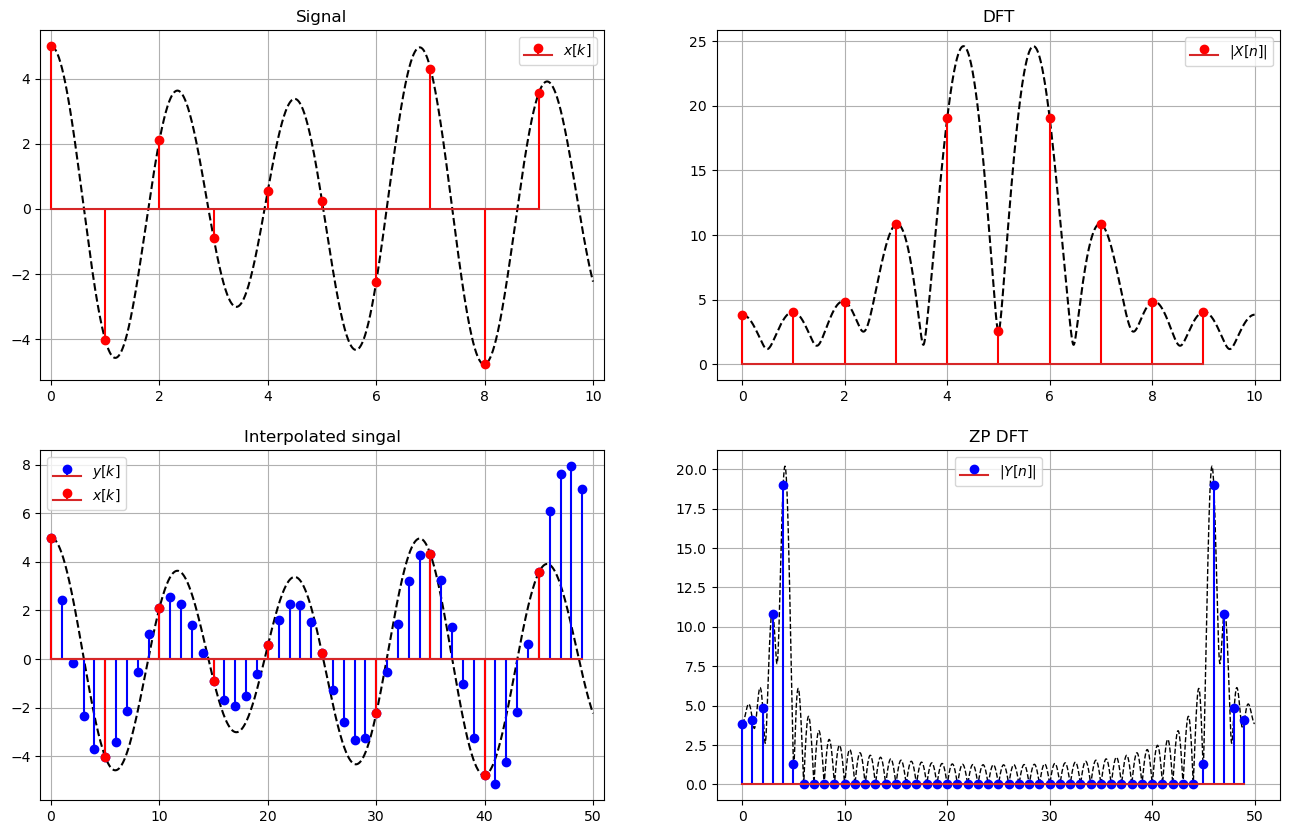

In [7]:
plt.subplots(2, 2, figsize = (16, 10))

plt.subplot(2, 2, 1)
plt.title('Signal')
plt.plot(t, x_cont, 'k--')
plt.stem(k, x, linefmt='r', markerfmt='or', label='$x[k]$')
plt.grid()
plt.xlim(-0.2, N+0.2)
plt.legend()

plt.subplot(2, 2, 2)
plt.title('DFT')
plt.plot(np.linspace(0, N, T), abs(np.fft.fft(x, T)), 'k--')
plt.stem(k, abs(X), linefmt='r', markerfmt='or', label='$|X[n]|$')
plt.grid()
plt.legend()

plt.subplot(2, 2, 3)
plt.title('Interpolated singal')
plt.plot(t * L, x_cont, 'k--')
plt.stem(np.arange(N*L), y, linefmt='b',  markerfmt='ob', label='$y[k]$')
plt.stem(np.arange(stop=N*L, step=L), x, linefmt='r', markerfmt='o'+'r', label='$x[k]$')
plt.grid()
plt.xlim(-1, N*L+1)
plt.legend()

plt.subplot(2, 2, 4)
plt.title('ZP DFT')
plt.plot(np.linspace(0, N, T) * L, abs(np.fft.fft(y, T))/L, 'k--', lw=1)
plt.stem(np.arange(N*L), abs(X_zp), linefmt='b',  markerfmt='ob', label='$|Y[n]|$')
plt.grid()
plt.legend()

plt.show()

## Задача 1.2. Система однократной интерполяции.

Промоделируйте работу системы однократной интерполяции с коэффицентом $L$ при подаче на ее вход сигнала $x[k]=3\sin \left(2\pi \nu_1 k\right)+6\sin\left(2\pi \nu_2 k\right)$, $k=0,1,\dots, 31$, $\nu_1=0,125$, $\nu_2=2\nu_1$ с помощью функции ``scipy.signal.upfirdn()``

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $L$ |2 | 4 | 8 | 2 | 4 | 8|
| $f_s$ |200 | 500 | 600 | 700 | 400 | 100 |

1) Обоснуйте Ваш выбор КИХ-фильтра для системы интерполяции. Изобразите на графиках его импульсную характеристику $h[k]$, АЧХ и ФЧХ.

2) Постройте графики, иллюстрирующие работу системы интерполяции во временной области:

* а) входного сигнала $x[k]$,

* б) сигнала $q[k]$, получаемого добавлением $L-1$ отсчета между каждой парой исходных отсчетов,

* в) выходного сигнала $y[k]$.

3) Постройте графики модуля ДВПФ последовательностей $x[k]$, $h[k]$, $q[k]$ и $y[k]$, иллюстрирующих работу системы интерполяции во частотной области.

4) Пусть частота дискретизации входного сигнала данной системы интерполяции равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы интерполяции. 



In [8]:
L = 2
fs = 200

In [9]:
N = 64
k = np.arange(N)
nu1 = 0.125
nu2 = 0.25
x = 3*np.sin(2*np.pi*nu1*k) + 6*np.sin(2*np.pi*nu2*k)

In [10]:
num_taps=31
# bands = np.array([0, 1/(2*L)-0.02, 1/(2*L)+0.02, 0.5])
# desired = np.array([L, 0])
# weight = np.array([1, 1])
# h_lpf = signal.remez(numtaps=num_taps, bands=bands, desired=desired, weight=weight, fs=1)
h_lpf = signal.firwin(numtaps=num_taps, window='hann', cutoff=1/(2*L), fs=1)  # flat inband ampitude response
h_lpf/=sum(h_lpf)

In [11]:
def plot_h(h, L):
    plt.subplots(1, 4, figsize=(30, 6))
    plt.subplot(1, 4, 1)
    plt.title('Impulse response')
    plt.stem(np.arange(len(h)), h, markerfmt='o', label='$h[k]$')
    plt.grid()
    plt.legend(loc='best')
    plt.xlabel('$k$')

    nu, H = DTFT(h)
    plt.subplot(1, 4, 2)
    plt.title('Amlitude response')
    plt.plot(nu, 20*np.log10(abs(H)), lw=2, label='$|H(\\nu)|$')
    plt.vlines([1/2/L, -1/2/L], ymin=-80, ymax=10, color='r', ls='--', lw=2, label='cutoff')
    plt.grid()
    plt.legend(loc='best')
    plt.xlabel('$\\nu$')

    plt.subplot(1, 4, 3)
    plt.title('Phase response')
    plt.plot(nu, np.angle(H), lw=2, label='arg[$H(\\nu)$]')
    plt.grid()
    plt.legend(loc='best')
    plt.xlabel('$\\nu$')

    plt.subplot(1, 4, 4)
    plt.title('Group delay')
    plt.plot(*signal.group_delay((h, 1), fs=1, whole=True), lw=2, label='group delay')
    plt.ylim([len(h)//2 - 3, len(h)//2+3])
    plt.grid()
    plt.legend(loc='best')
    plt.xlabel('$\\nu$')

    plt.show()

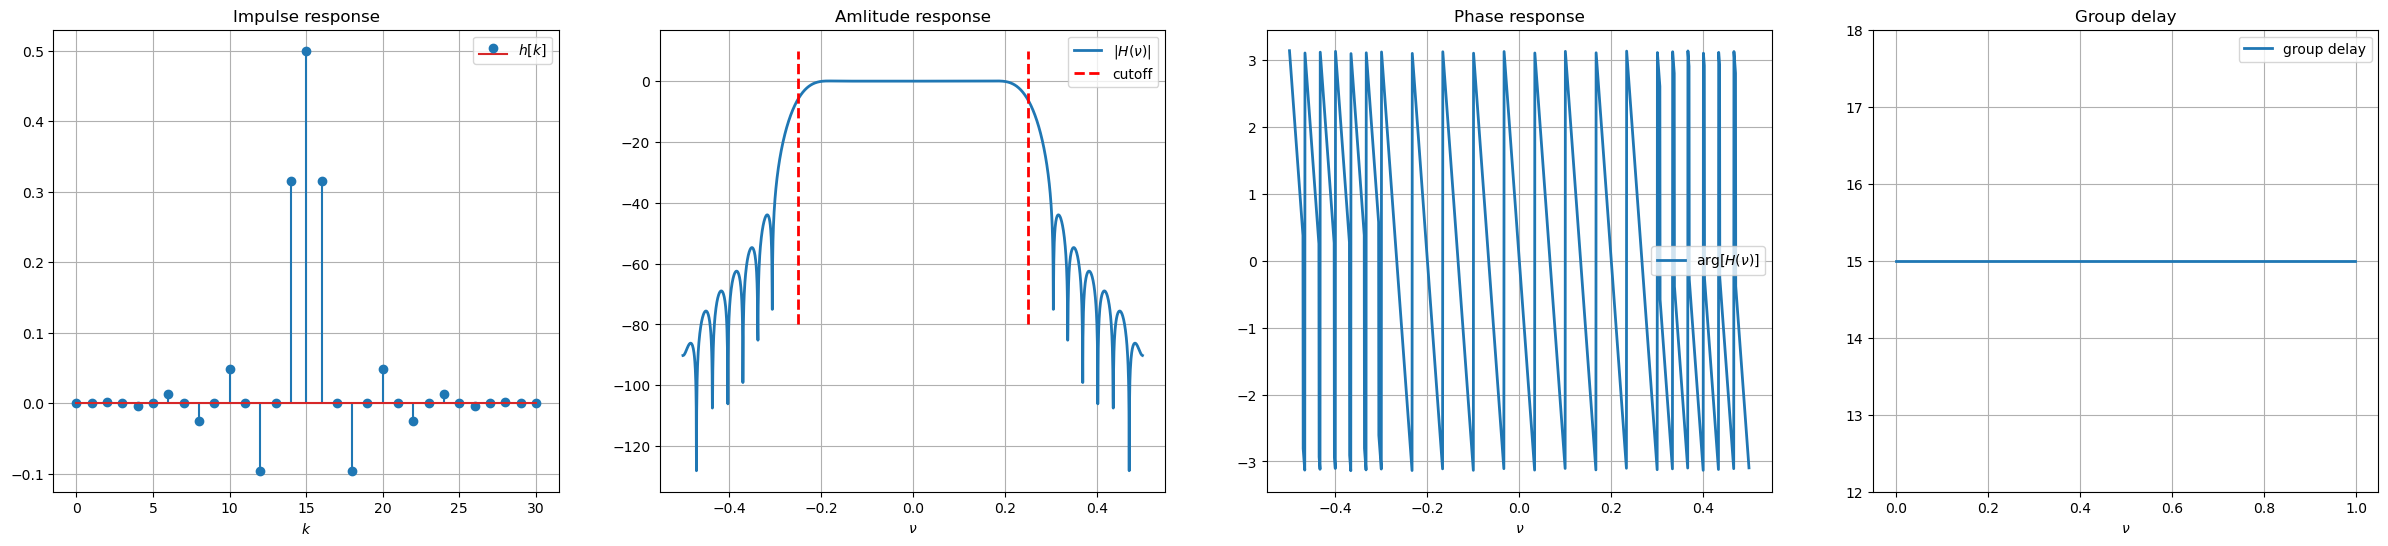

In [12]:
plot_h(h_lpf, L=2)

In [13]:
q = np.zeros((len(x)*L))
q[::L] = x

y = signal.upfirdn(h_lpf, x, up=L)

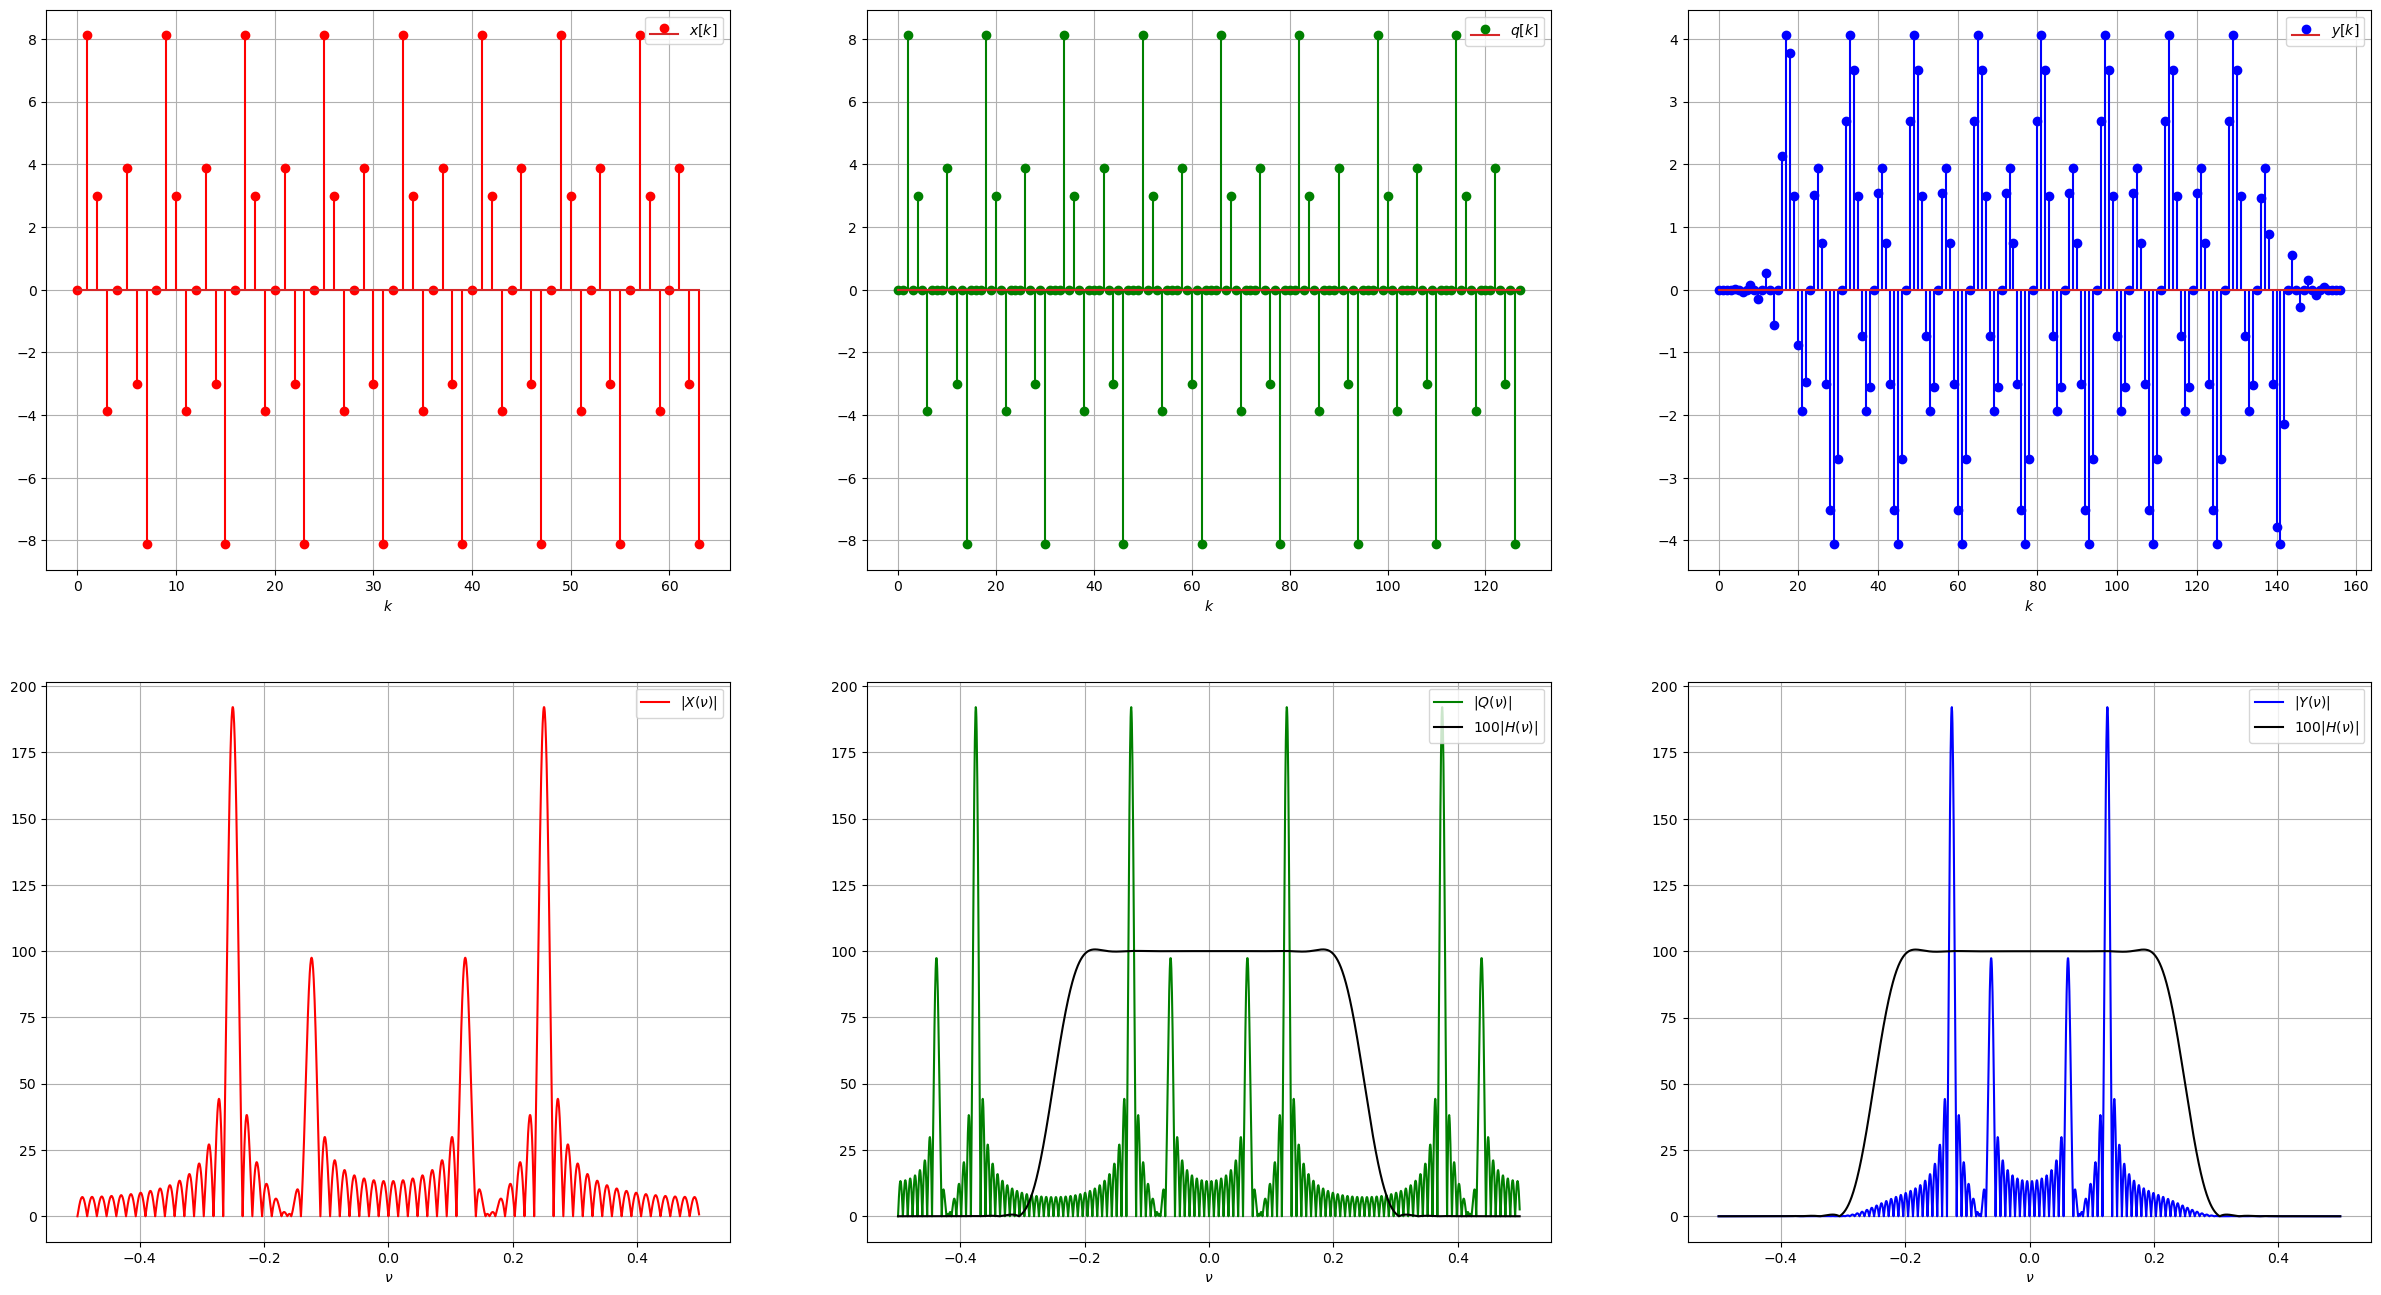

In [14]:
plt.subplots(2, 3, figsize=(30, 16))
plt.subplot(2, 3, 1)
plt.stem(np.arange(x.size), x, linefmt='r', markerfmt='or', label='$x[k]$')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('$k$')

plt.subplot(2, 3, 2)
plt.stem(np.arange(len(q)), q, linefmt='g', markerfmt='og', label='$q[k]$')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('$k$')

plt.subplot(2, 3, 3)
plt.stem(np.arange(y.size), y, linefmt='b', markerfmt='ob', label='$y[k]$')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('$k$')

nu, H = DTFT(h_lpf)
nu_x, X = DTFT(x)
nu_q, Q = DTFT(q)
nu_y, Y = DTFT(y)

plt.subplot(2, 3, 4)
plt.plot(nu_x, abs(X), 'r', label='$|X(\\nu)|$')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('$\\nu$')

plt.subplot(2, 3, 5)
plt.plot(nu_q, abs(Q), 'g', label='$|Q(\\nu)|$')
plt.plot(nu, 100*abs(H), 'k', label='$100|H(\\nu)|$')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('$\\nu$')

plt.subplot(2, 3, 6)
plt.plot(nu_y, abs(Y), 'b', label='$|Y(\\nu)|$')
plt.plot(nu, 100*abs(H), 'k', label='$100|H(\\nu)|$')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('$\\nu$')

plt.show()

## Задача 1.3. Интерполяция первого и нулевого порядка.

Повторите вычисления задачи 1.2 для КИХ-фильтров с импульсными характеристиками ${{h}_{0}}[k]$ и ${{h}_{1}}[k]$ и $L=2$. Сравните результаты.

${{h}_{0}}[k]=\left\{ \begin{matrix}
   1,\ \ \text{ при }k=0,\ \ 1,  \\
   0,\ \ \text{ при других }k.  \\
\end{matrix} \right.$

${{h}_{1}}[k]=\left\{ \begin{matrix}
   0,5,\ \ \text{ при }k=0,\ \ 2,  \\
   1,\ \ \text{ при }k=1,  \\
   0,\ \ \text{ при других  }k.  \\
\end{matrix} \right.$



In [15]:
h0 = np.array([1., 1.])

h1 = np.array([0.5, 1., 0.5])  

In [16]:
def plot_interpolation(x, h, L):
    plt.subplots(3, 3, figsize=(24, 16))
    plt.subplot(3, 3, 1)
    plt.stem(np.arange(len(h)), h, linefmt='k', markerfmt='ok', label='$h[k]$')
    plt.grid()
    plt.legend(loc='upper right')
    plt.xlabel('$k$')

    nu, H = DTFT(h)
    plt.subplot(3, 3, 2)
    plt.plot(nu, abs(H), 'k', label='$|H(\\nu)|$')
    plt.grid()
    plt.legend(loc='upper right')
    plt.xlabel('$\\nu$')

    plt.subplot(3, 3, 3)
    plt.plot(nu, np.angle(H), 'k', label='arg[$H(\\nu)]$')
    plt.grid()
    plt.legend(loc='upper right')
    plt.xlabel('$\\nu$')

    q = np.zeros(N*L)
    q[::L] = x
    y = signal.upfirdn(h, x, up=L)

    plt.subplot(3, 3, 4)
    plt.stem(np.arange(len(x)), x, linefmt='r', markerfmt='or', label='$x[k]$')
    plt.grid()
    plt.legend(loc='upper right')
    plt.xlabel('$k$')

    plt.subplot(3, 3, 5)
    plt.stem(np.arange(len(q)), q, linefmt='g', markerfmt='og', label='$q[k]$')
    plt.grid()
    plt.legend(loc='upper right')
    plt.xlabel('$k$')

    plt.subplot(3, 3, 6)
    plt.stem(np.arange(len(y)), y, linefmt='b', markerfmt='ob', label='$y[k]$')
    plt.grid()
    plt.legend(loc = 'upper right')
    plt.xlabel('$k$')

    nu, H = DTFT(h)
    nu_q, Q = DTFT(q)
    nu_y, Y = DTFT(y)

    plt.subplot(3, 3, 7)
    plt.plot(nu_x, abs(X), 'r', label='$|X(\\nu)|$')
    plt.grid()
    plt.legend(loc = 'upper right')
    plt.xlabel('$\\nu$')

    plt.subplot(3, 3, 8)
    plt.plot(nu_q, abs(Q), 'g', label='$|Q(\\nu)|$')
    plt.plot(nu, 100*abs(H), 'k', label='$100|H(\\nu)|$')
    plt.grid()
    plt.legend(loc = 'upper right')
    plt.xlabel('$\\nu$')

    plt.subplot(3, 3, 9)
    plt.plot(nu_y, abs(Y), 'b', label='$|Y(\\nu)|$')
    plt.plot(nu, 100*abs(H), 'k', label='$100|H(\\nu)|$')
    plt.grid()
    plt.legend(loc = 'upper right')
    plt.xlabel('$\\nu$')

    plt.show()

Интерполяция нулевого порядка

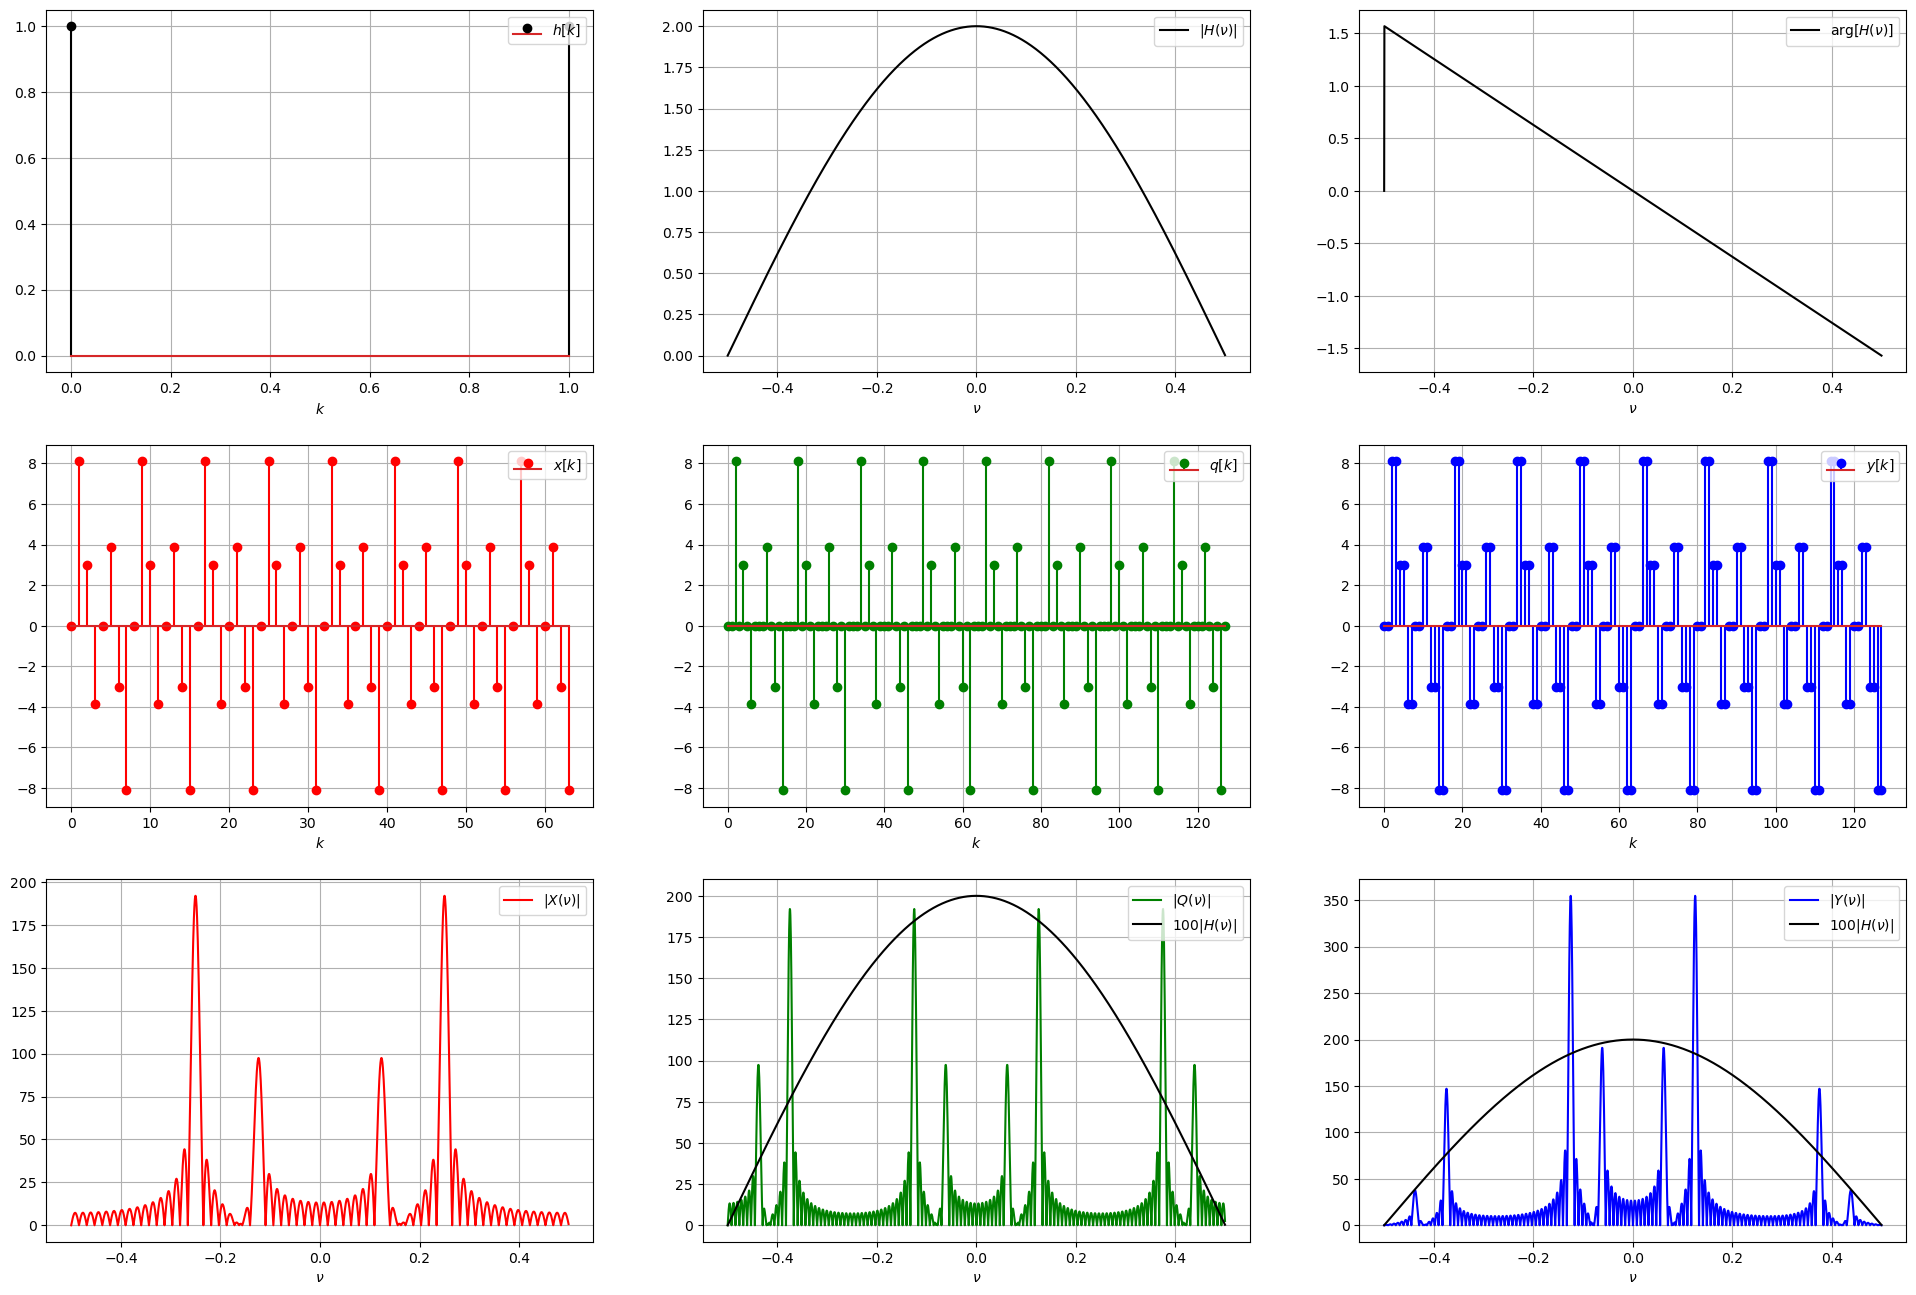

In [17]:
plot_interpolation(x, h0, L)

Интерполяция перовго порядка

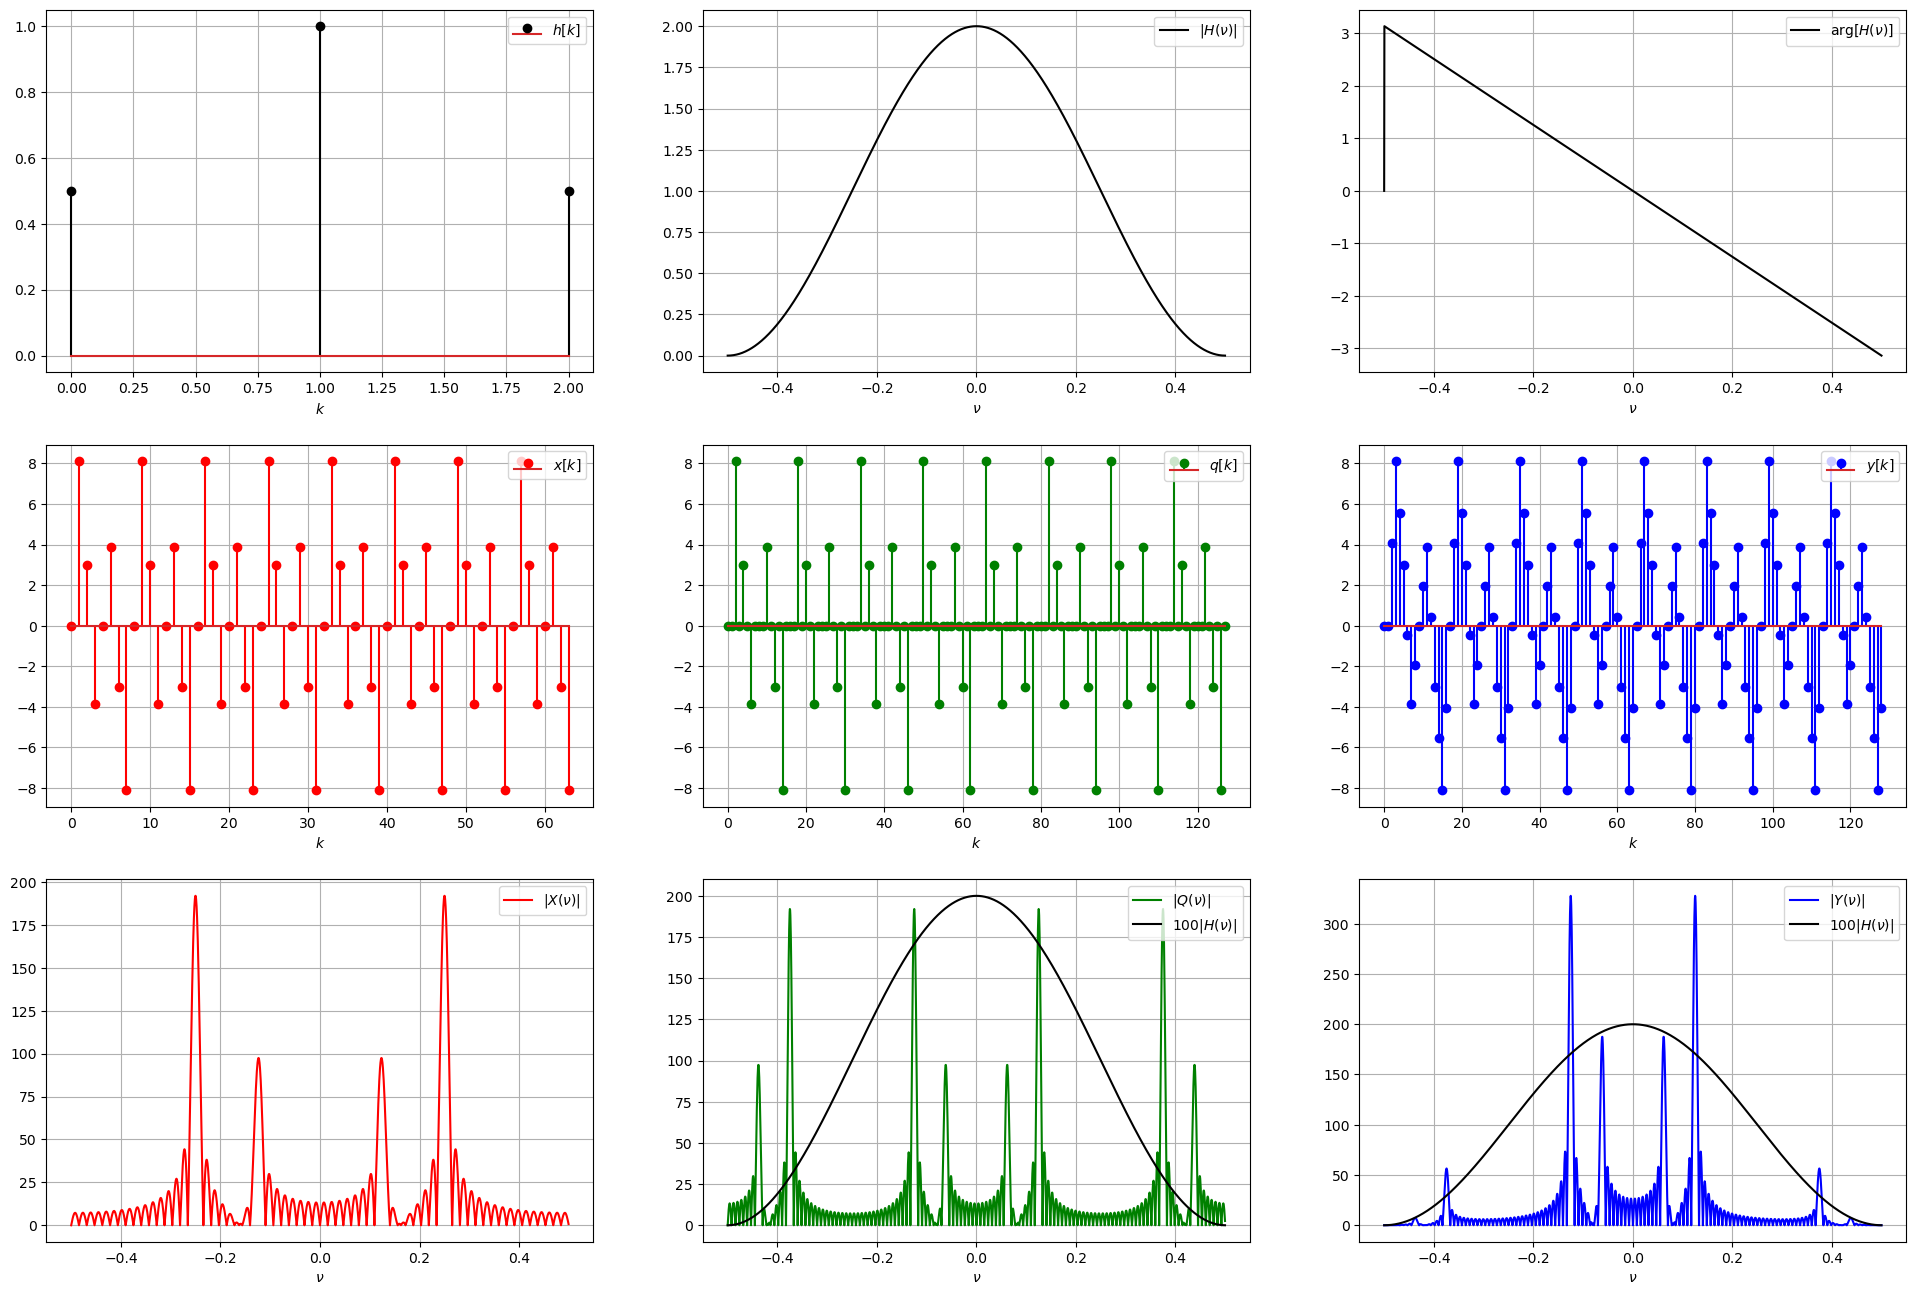

In [18]:
plot_interpolation(x, h1, L)

#  Модуль 2. Прореживание сигналов и передискретизация с рациональным шагом.

## Задача 2.1. Система однократной децимации.

Промоделируйте работу системы однократной децимации с коэффицентом $M$ при подаче на ее вход сигнала $x[k]=3\sin \left(2\pi \nu_1 k\right)+6\sin\left(2\pi \nu_2 k\right)$, $k=0,1,\dots, 127$, $\nu_1=1/64$, $\nu_2=2\nu_1$.

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $M$ |2 | 4 | 8 | 2 | 4 | 8|
| $f_s$ |200 | 500 | 600 | 700 | 400 | 100 |

1) Обоснуйте Ваш выбор фильтра для системы децимации. Изобразите на графиках его импульсную характеристику $h[k]$, АЧХ и ФЧХ.

2) Постройте графики, иллюстрирующие работу системы интерполяции во временной области:

* а) входного сигнала $x[k]$,

* б) выходного сигнала $y[k]$.

3) Постройте графики модуля ДВПФ последовательностей $x[k]$ и $y[k]$, иллюстрирующих работу системы интерполяции во частотной области.

4) Пусть частота дискретизации входного сигнала системы однокраной децимации равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы. 

$ \tilde{f}_s = f_s/M = 100$

 $\tilde{t}_s = 1/\tilde{f}_s = 0.01$

In [19]:
N = 64
k = np.arange(N)
nu1 = 1/N
nu2 = 2/N
x = 3*np.sin(2*np.pi*nu1*k) + 6*np.sin(2*np.pi*nu2*k)

In [20]:
M = 2
q = x[::M]

In [21]:
num_taps=31
h_lpf = signal.firwin(numtaps=num_taps, window='hann', cutoff=1/(2*M), fs=1)  # flat inband ampitude response
h_lpf/=sum(h_lpf)

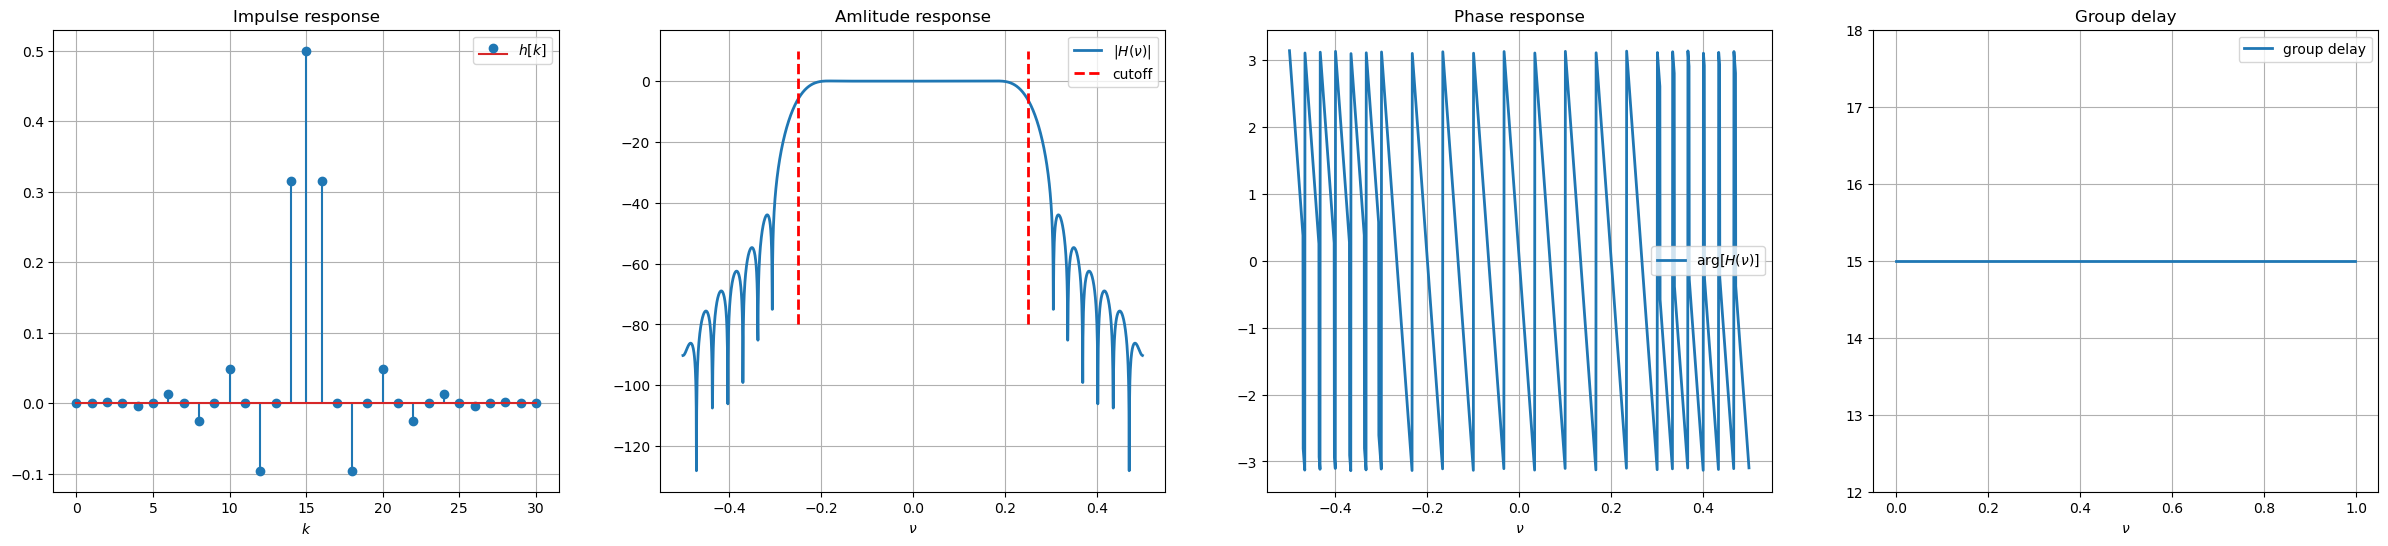

In [22]:
plot_h(h_lpf, L=M)

In [23]:
y = signal.upfirdn(h_lpf, x, down=M)

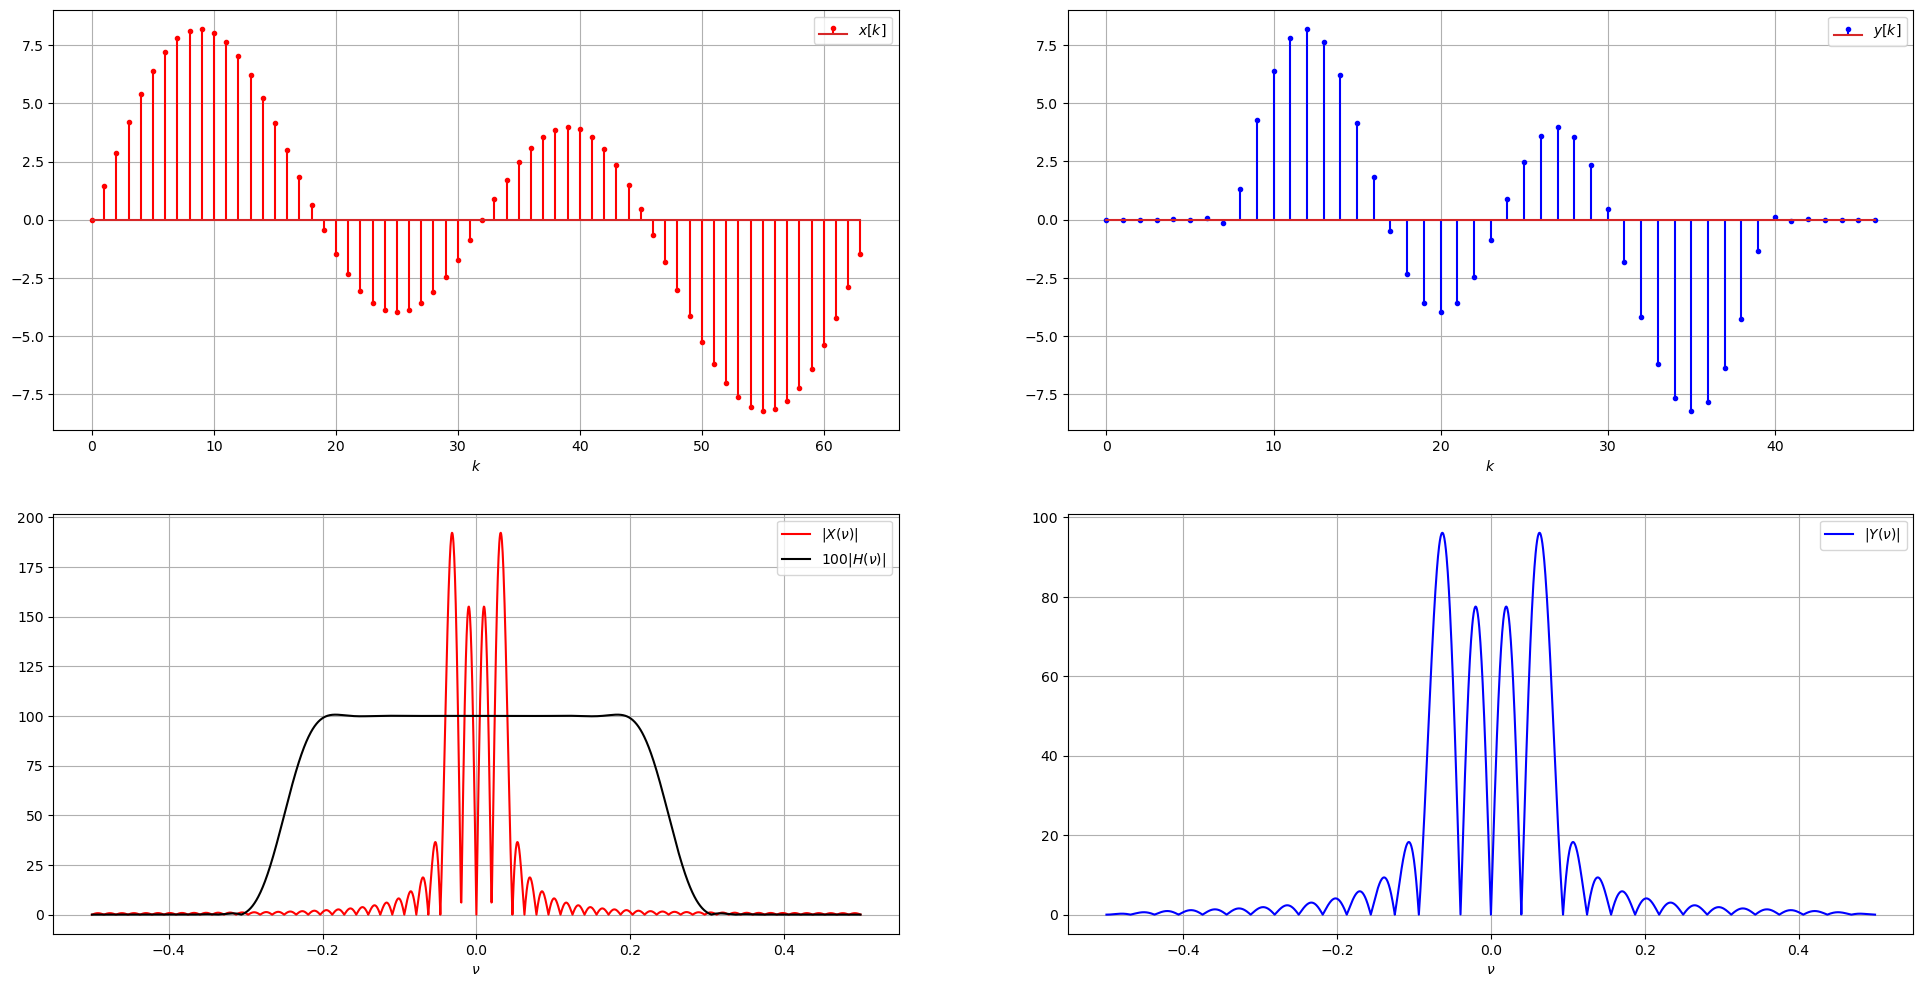

In [24]:
plt.subplots(2, 2, figsize=(24, 12))
plt.subplot(2, 2, 1)
plt.stem(np.arange(x.size), x, linefmt='r',markerfmt='.r', label='$x[k]$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

plt.subplot(2, 2, 2)
plt.stem(np.arange(y.size), y, linefmt='b', markerfmt='.b', label='$y[k]$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

nu, H = DTFT(h_lpf)
nu_x, X = DTFT(x)
nu_y, Y = DTFT(y)

plt.subplot(2, 2, 3)
plt.plot(nu_x, abs(X), 'r', label='$|X(\\nu)|$')
plt.plot(nu, 100*abs(H), 'k', label='$100|H(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.subplot(2, 2, 4)
plt.plot(nu_y, abs(Y), 'b', label='$|Y(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.show()

## Задача 2.2. Система однократной передискретизации с рациональным шагом.

Промоделируйте работу системы однократной передискретизации с коэффицентом $L/M=5/2$ при подаче на ее вход сигнала $x[k]=3\sin \left(2\pi \nu_1 k\right)+6\sin\left(2\pi \nu_2 k\right)$, $k=0,1,\dots, 63$, $\nu_1=0,0625$, $\nu_2=2\nu_1$.

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $f_s$ |200 | 500 | 600 | 700 | 400 | 100 |

1) Обоснуйте Ваш выбор фильтра для однократной передискретизации. Изобразите на графиках его АЧХ и ФЧХ.

2) Постройте графики, иллюстрирующие работу системы передискретизации во временной области:

* а) входного сигнала $x[k]$,

* б) выходного сигнала $y[k]$.

3) Постройте графики модуля ДВПФ последовательностей $x[k]$ и $y[k]$, иллюстрирующих работу системы передискретизации во частотной области.

4) Пусть частота дискретизации входного сигнала системы равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы. 

$ \tilde{f}_s = f_s/M = 500$

 $\tilde{t}_s = 1/\tilde{f}_s = 0.02$

In [25]:
N = 64
k = np.arange(N)
nu1 = 4/N
nu2 = 8/N

In [26]:
x = 3*np.sin(2*np.pi*nu1*k) + 6*np.sin(2*np.pi*nu2*k)

In [27]:
M = 2
L = 5

num_taps = 51
cutoff = min(1/(2*L), 1/(2*M))
trans = 0.05

h_lpf = signal.remez(numtaps=num_taps, bands=[0, cutoff, cutoff+trans, 1/2], desired=[1., 0], weight=[1, 1], fs=1)
h_lpf/=sum(h_lpf)

In [28]:
display(Math(rf'$f_\text{{c}} = \min\left(\dfrac{{1}}{{2L}},\,\dfrac{{1}}{{2M}}\right) = {cutoff}$'))

<IPython.core.display.Math object>

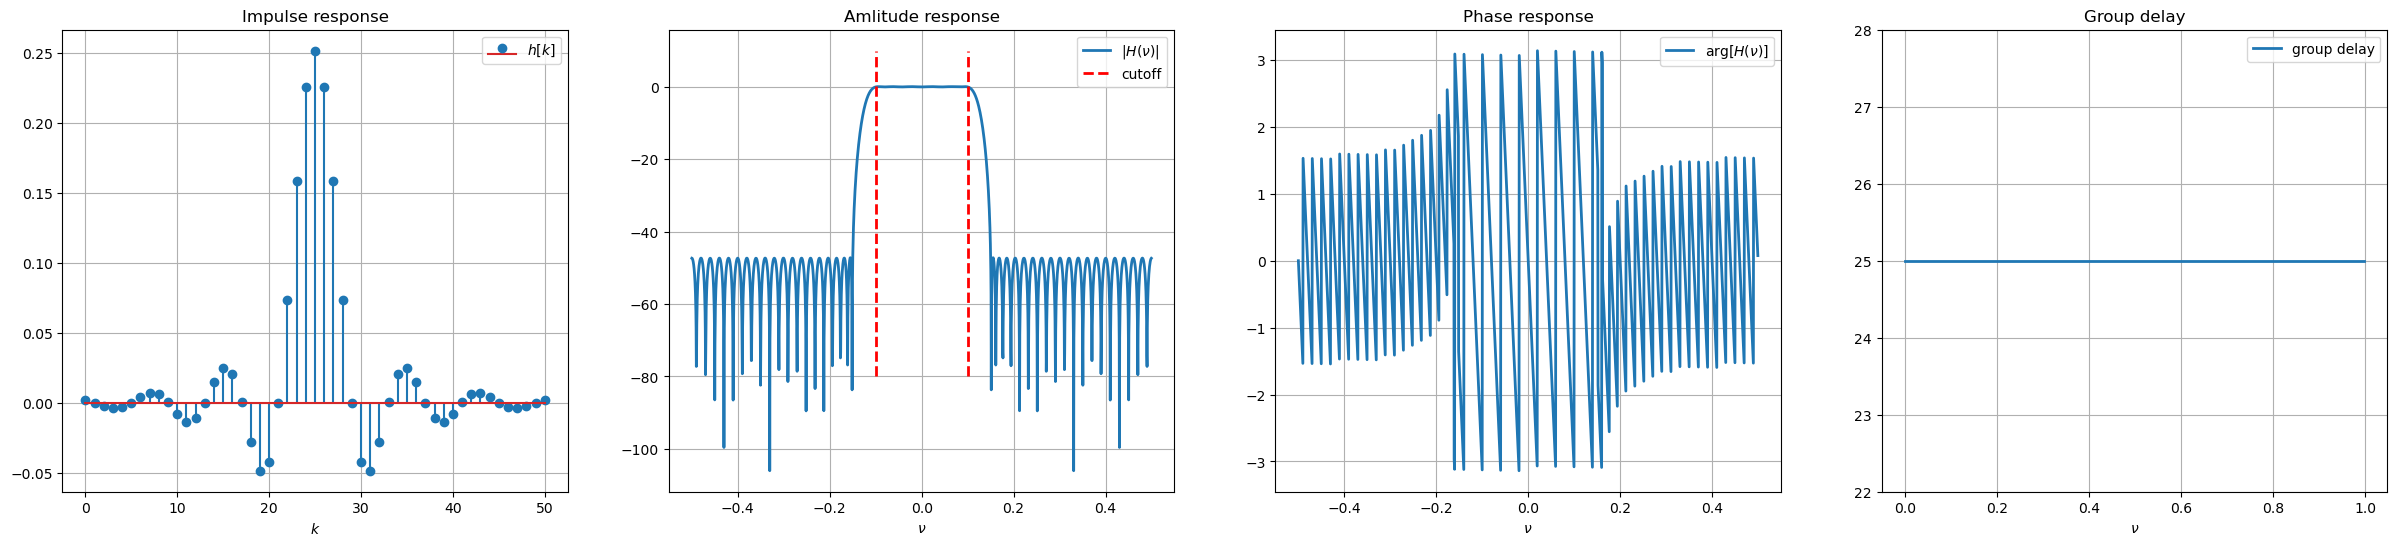

In [29]:
plot_h(h_lpf, L=max(M, L))

In [30]:
y = signal.upfirdn(h_lpf, x, up=L, down=M) * L

In [31]:
q = signal.upfirdn([1], x, up=L) 

In [32]:
q_filt = np.convolve(q, h_lpf) * L

In [33]:
np.allclose(q_filt[::M], y)

True

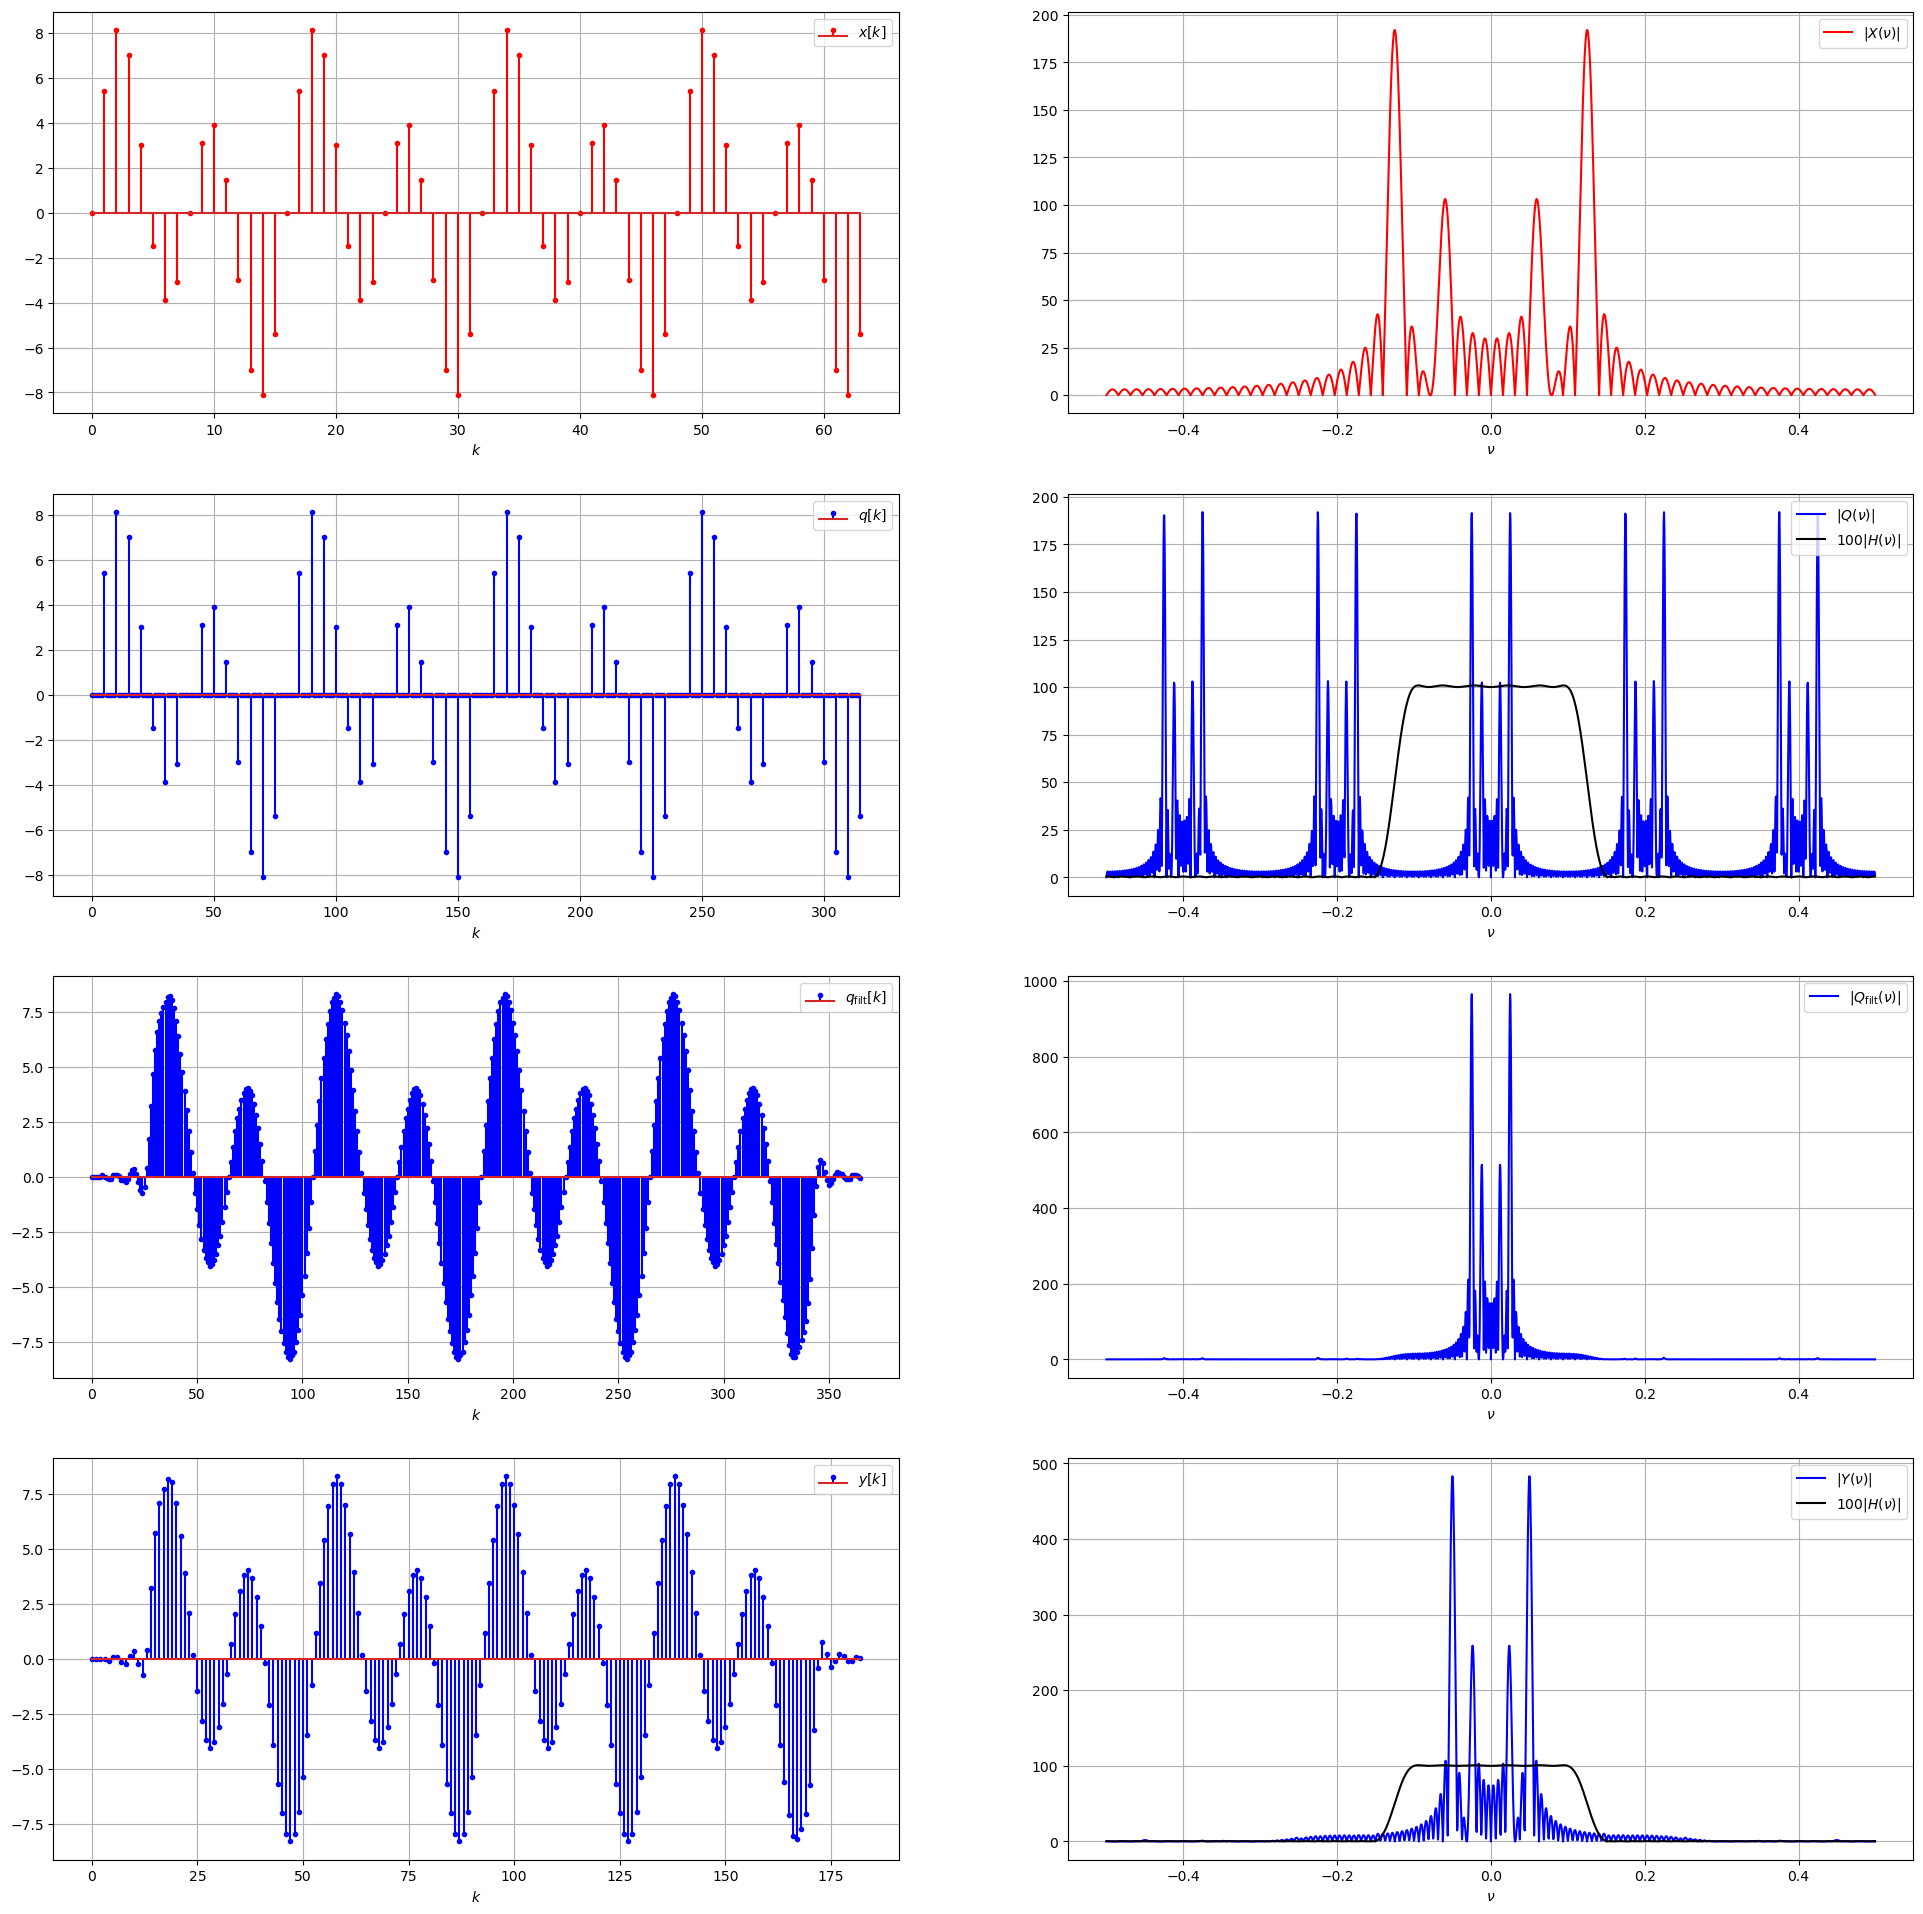

In [34]:
plt.subplots(4, 2, figsize=(24, 24))
plt.subplot(4, 2, 1)
plt.stem(np.arange(len(x)), x, linefmt='r',markerfmt='.r', label='$x[k]$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

plt.subplot(4, 2, 3)
plt.stem(np.arange(len(q)), q, linefmt='b', markerfmt='.b', label='$q[k]$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

plt.subplot(4, 2, 5)
plt.stem(np.arange(len(q_filt)), q_filt, linefmt='b', markerfmt='.b', label=r'$q_\text{filt}[k]$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

plt.subplot(4, 2, 7)
plt.stem(np.arange(y.size), y, linefmt='b', markerfmt='.b', label='$y[k]$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

nu, H = DTFT(h_lpf)
nu_x, X = DTFT(x)
nu_q, Q = DTFT(q)
nu_q_filt, Q_filt = DTFT(q_filt)
nu_y, Y = DTFT(y)

plt.subplot(4, 2, 2)
plt.plot(nu_x, abs(X), 'r', label='$|X(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.subplot(4, 2, 4)
plt.plot(nu_q, abs(Q), 'b', label='$|Q(\\nu)|$')
plt.plot(nu, 100*abs(H), 'k', label='$100|H(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.subplot(4, 2, 6)
plt.plot(nu_q_filt, abs(Q_filt), 'b', label=r'$|Q_\text{filt}(\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.subplot(4, 2, 8)
plt.plot(nu_y, abs(Y), 'b', label='$|Y(\\nu)|$')
plt.plot(nu, 100*abs(H), 'k', label='$100|H(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.show()

#  Модуль 3. Особенности реализации многоскоростных систем.

## Задача 3.1. Полифазные структуры многоскоростных систем.

Промоделируйте работу системы однократной интерполяции с коэффицентом $L=4$ при подаче на ее вход сигнала $x[k]=3\sin \left(2\pi \nu_1 k\right)+6\sin\left(2\pi \nu_2 k\right)$, $k=0,1,\dots, 31$, $\nu_1=5/32$, $\nu_2=2\nu_1$ с помощью функции ``scipy.signal.resample_poly()``

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $f_s$ |200 | 500 | 600 | 700 | 400 | 100 |

1) Постройте графики входного ($x[k]$) и выходного ($y[k]$) сигналов, и модулей их ДВПФ.

2) Изобразите схему данной полифазной структуры однократной интерполяции. 

3) Пусть частота дискретизации входного сигнала данной системы интерполяции равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы. 


$ \tilde{f}_s = f_s \cdot L = 800$

 $\tilde{t}_s = 1/\tilde{f}_s = 0.00125$

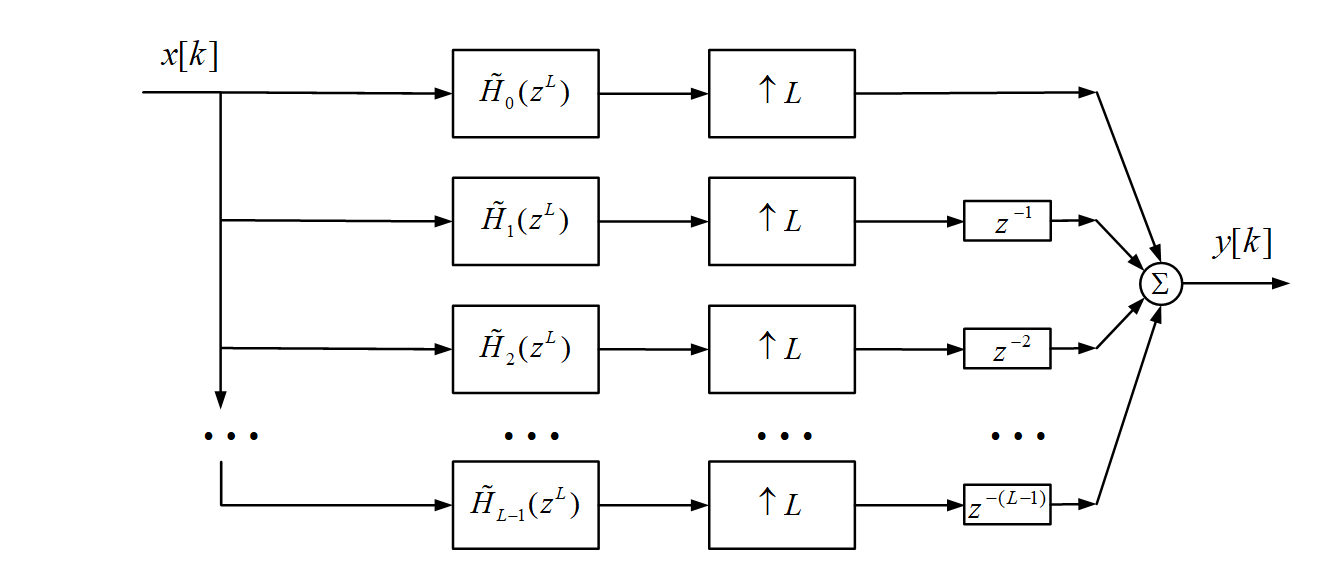

Примечание: после фильтраций ампсемплинги и задержки эквивалентны последовательному переключению между ветвями (то есть мы не тратим ресурсы на обработки нулей и сложение)

In [35]:
fs = 200
L = 4
N = 32
k = np.arange(N)
nu1 = 5/N
nu2 = 10/N
x = 3*np.sin(2*np.pi*nu1*k) + 6*np.sin(2*np.pi*nu2*k)

In [36]:
y = signal.resample_poly(x, L, 1)

Common interpolation with zero-padding

In [37]:
# default filter from resample_poly
max_rate = L
f_c = 1. / max_rate  # cutoff of FIR filter (rel. to Nyquist)
half_len = 10 * max_rate  # reasonable cutoff for sinc-like function
N_fir = 2 * half_len + 1
h = signal.firwin(N_fir, f_c, window=('kaiser', 5)).astype(x.dtype)  # match dtype of x
h *= L

z = np.zeros(N*L)
z[::L] = x
z = np.convolve(z, h, mode='same')

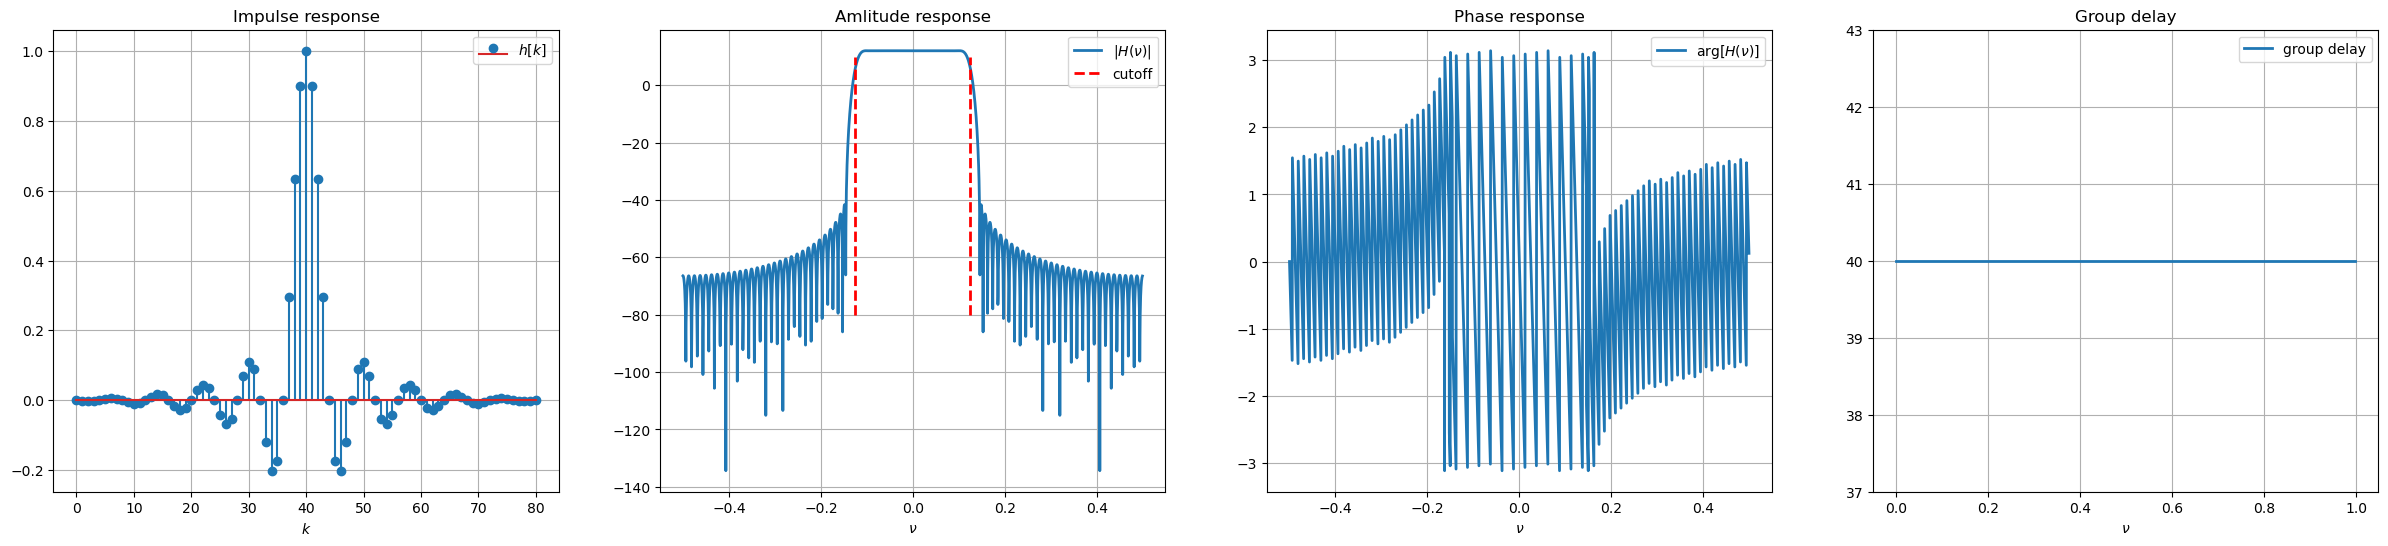

In [38]:
plot_h(h, L=L)

In [39]:
np.allclose(z, y)  # results are the same

True

Implementation of polyphase interpolation

In [40]:
G=int(np.floor(N_fir/L))
G_mod = np.mod(N_fir, L)

if G_mod == 0:  # divisible
    h_br=np.zeros([L, G])
    for m in range(L):
        h_br[m]=h[m:N_fir:L]
        
    x_filtered=np.zeros([L, L*(len(x)+G-1)])
    for m in range(L):
        x_filtered[m][m::L]=signal.convolve(x, h_br[m])
    y_manual = np.sum(x_filtered, axis=0)
else:   # not divisible
    h_br=np.zeros([L, G+1])
    for m in range(L):
        if G_mod > 0:
            h_br[m]=h[m:N_fir:L]
            G_mod -= 1
        else:
            h_br[m][:-1]=h[m:N_fir:L]
            G_mod -= 1
            
    x_filtered=np.zeros([L, L*(len(x)+G)])
    for m in range(L):
        x_filtered[m][m::L]=signal.convolve(x, h_br[m])
    y_manual = np.sum(x_filtered, axis=0)

    
y_manual = y_manual[N_fir//2: -(N_fir//2)]

In [41]:
np.allclose(y_manual, y)

True

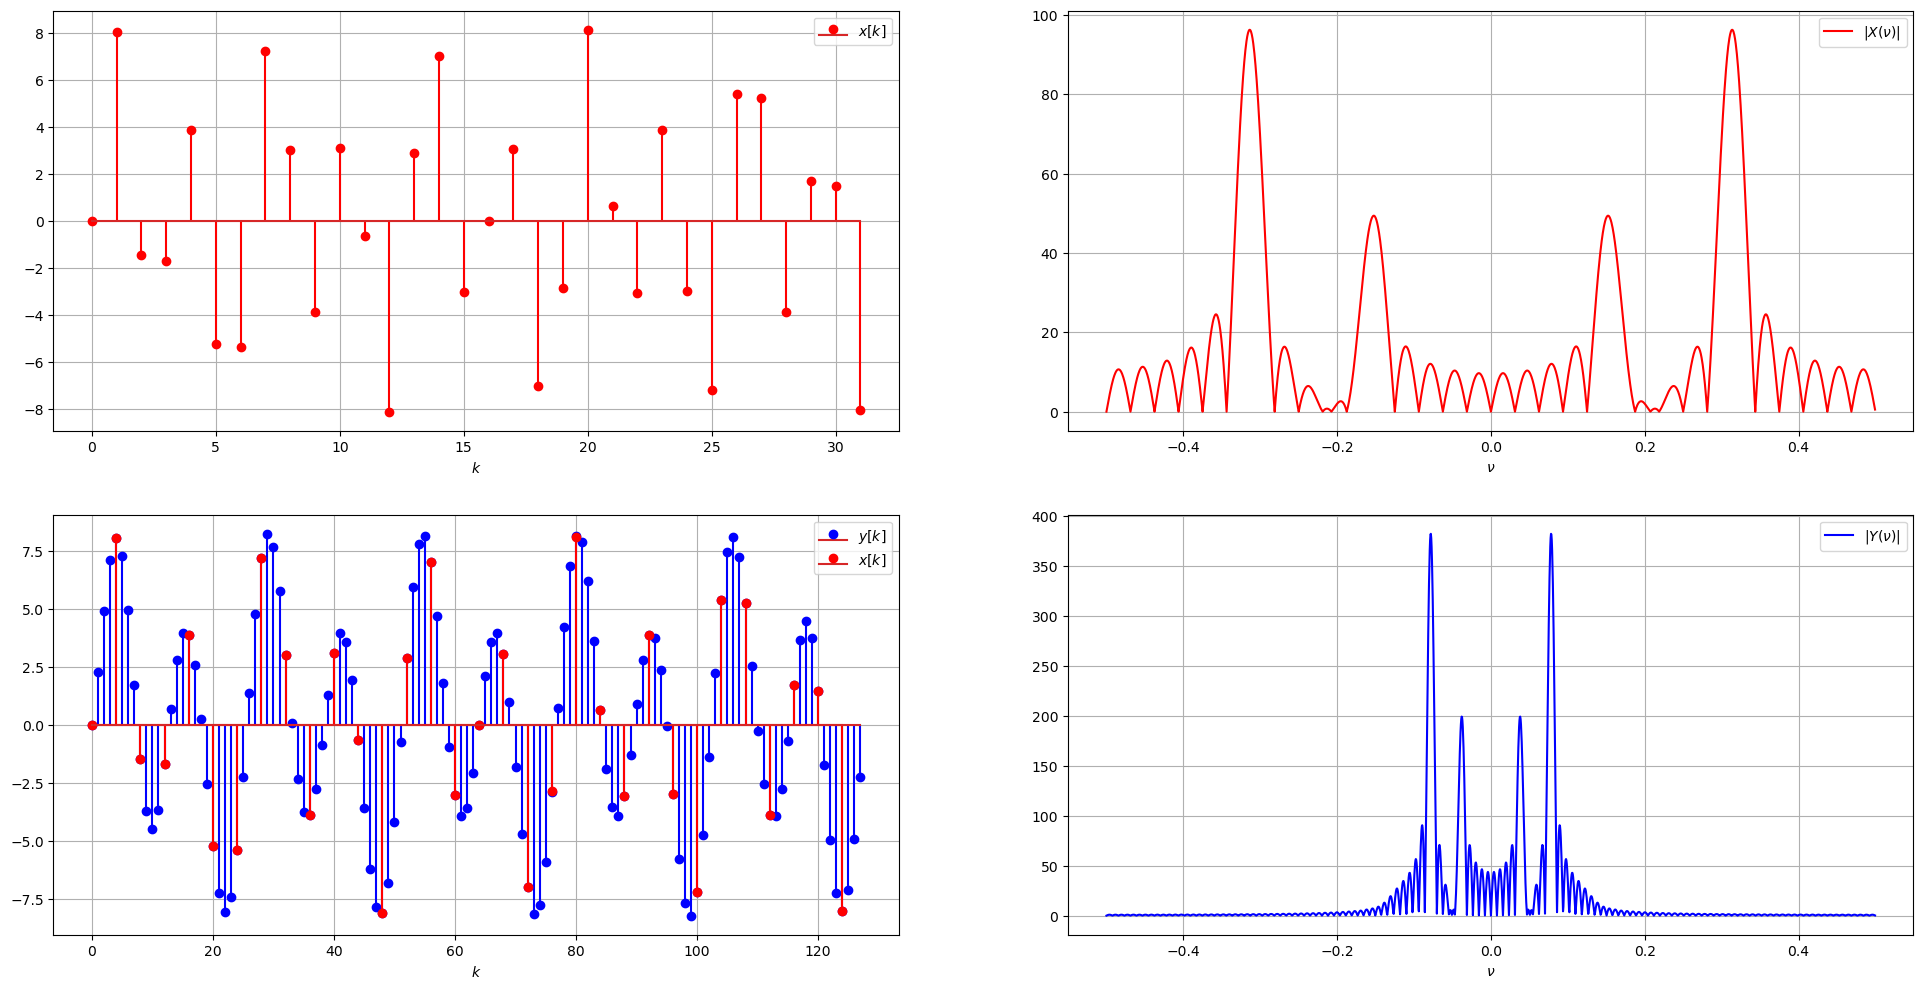

In [42]:
plt.subplots(2, 2, figsize=(24, 12))
plt.subplot(2, 2, 1)
plt.stem(k, x, linefmt='r', markerfmt='or', label='$x[k]$')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('$k$')

k_y = np.arange(len(y))
plt.subplot(2, 2, 3)
plt.stem(k_y, y, linefmt='b', markerfmt='ob', label='$y[k]$')
plt.stem(k_y[::L], x, linefmt='r', markerfmt='or', label='$x[k]$')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('$k$')

nu_x, X = DTFT(x)
nu_y, Y = DTFT(y)

plt.subplot(2, 2, 2)
plt.plot(nu_x, abs(X), 'r', label='$|X(\\nu)|$')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('$\\nu$')

plt.subplot(2, 2, 4)
plt.plot(nu_y, abs(Y), 'b', label='$|Y(\\nu)|$')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('$\\nu$')

plt.show()

## Задача 3.2. CIC-фильтры.

Постройте импульсную характеристику и АЧХ (в дБ) CIC-фильтра, состоящего из $Q$ последовательно соединенных каскадов, в каждом из которых длина импульсной характеристики равна $N$.

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $N$ |16 | 16 | 16 | 12 | 12 | 12 |
| $Q$ | 3 | 4 | 5 | 3 | 4 | 5 |

Определите максимальный уровень пульсаций фильтра в полосе пропускания (по максимальному уровню бокового лепестка относительно главного). 





1. __Отдельный CIC-фильтр__

Импульсная характеристика
$${{h}_{1}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}[k-m].$$

Передаточная функция
$${{H}_{1}}\left( z \right)=\sum\limits_{m\,=\,0}^{N-1}{{{h}_{m}}}{{z}^{-m}}=1+{{z}^{-1}}+{{z}^{-2}}+.\text{ }\text{. }\text{. }{{z}^{-(N-1)}}=\frac{1-{{z}^{-N}}}{1-{{z}^{-1}}}.$$

Частотная характеристика
$${{H}_{1}}\left( \theta  \right)=\exp \left( -j\theta \frac{N-1}{2} \right)\frac{\sin \left( \frac{\theta N}{2} \right)}{\sin \left( \frac{\theta }{2} \right)}$$



2. __Каскадное соединение CIC-фильтров__:

Импульсная характеристика
$${{h}_{Q}}[k]={{h}_{1}}[k]^{\otimes Q}$$
Передаточная функция
$${{H}_{Q}}\left( z \right)={{H}_{1}}^Q\left( z \right)={{\left( \frac{1-{{z}^{-N}}}{1-{{z}^{-1}}} \right)}^{Q}}$$ 
АЧХ        
    $$\left| {{H}_{Q}}\left( \theta  \right) \right|=\frac{{{\sin }^{Q}}\left( \frac{\theta N}{2} \right)}{{{\sin }^{Q}}\left( \frac{\theta }{2} \right)}.$$

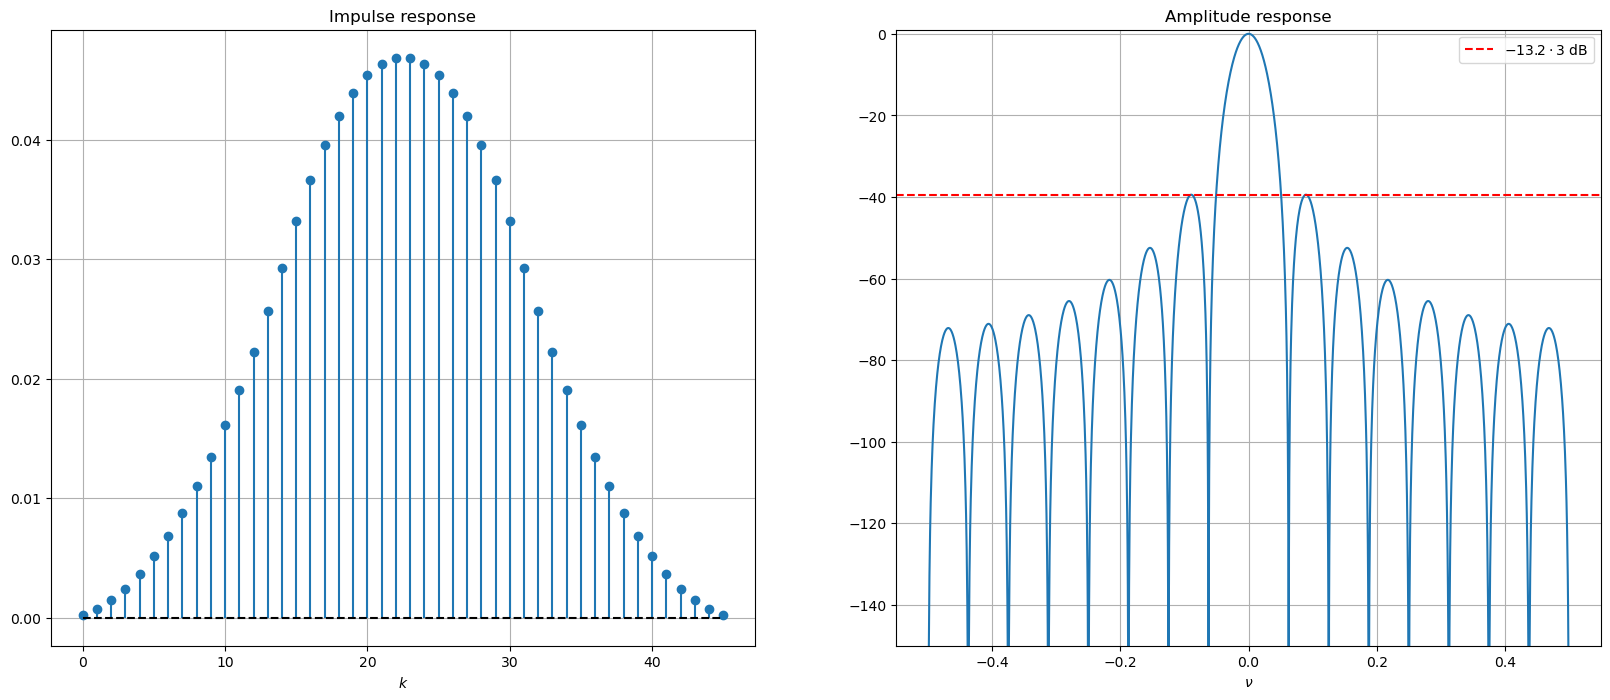

In [48]:
N = 16
Q = 3

h0 = np.ones(N)
h = h0.copy()

for _ in range(Q-1):
    h = np.convolve(h, h0)
    
h /= sum(h)
    
nu, H = DTFT(h)

plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.title("Impulse response")
plt.stem(np.arange(len(h)), h, basefmt='k--', markerfmt='o')
plt.grid()
plt.xlabel('$k$')

plt.subplot(122)
plt.title("Amplitude response")
plt.plot(nu, 20*np.log10(abs(H)+1e-15))
plt.axhline(-Q*13.2, ls='--', color='r', label=f"$-13.2\cdot{Q}$ dB")
plt.xlabel('$\\nu$')
plt.ylim([-150, 1])
plt.legend(loc='best')
plt.grid()

plt.show()